In [6]:
import pandas as pd
pd.set_option("display.max_rows", None)

# Customer Address Data

In [7]:
kpmg_customeradd=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerAddress", skiprows=1)
# if you want to skip the number of n rows from the top, you need to used the skiprows parameter.

In [8]:
kpmg_customeradd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
kpmg_customeradd.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [10]:
kpmg_customeradd.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


# Checking Completeness of Data

In [11]:
null_values=kpmg_customeradd.isnull().sum()
null_values

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [12]:
# Calculating Total Values
total_values=kpmg_customeradd.count().sort_values(ascending=False)
total_values

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

In [13]:
per_null_values=kpmg_customeradd.isnull().sum()/len(kpmg_customeradd)*100
per_null_values

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [14]:
missing_values=pd.concat({'Null values':null_values, 'Total Values':total_values, 'percent miss values':per_null_values}, axis=1)
missing_values

,Null values,Total Values,percent miss values
customer_id,0,3999,0.0
address,0,3999,0.0
postcode,0,3999,0.0
state,0,3999,0.0
country,0,3999,0.0
property_valuation,0,3999,0.0


# Checking Accuracy of Dataset

# checking single customer id and details

In [15]:
#cust_id=kpmg_customeradd[(kpmg_customeradd.customer_id==1000)]
cust_id1=kpmg_customeradd['postcode']==3064
cust_id_100=kpmg_customeradd[cust_id1]
#view customer details
print(cust_id_100[['address','state','country']])

                     address state    country
283       071 Cardinal Point   VIC  Australia
309    706 Anniversary Alley   VIC  Australia
311       4270 Loeprich Lane   VIC  Australia
432           91 Porter Pass   VIC  Australia
2025          23 Huxley Road   VIC  Australia
2776          99 Alpine Lane   VIC  Australia
2793          4 Rieder Drive   VIC  Australia
2884   37595 Packers Terrace   VIC  Australia
2945       984 Hoepker Court   VIC  Australia
3059    9317 Mendota Parkway   VIC  Australia
3293           3 Maple Place   VIC  Australia
3611   4643 Cambridge Circle   VIC  Australia
3686   47566 Old Gate Avenue   VIC  Australia
3694         856 Basil Drive   VIC  Australia
3710      25 Melvin Junction   VIC  Australia
3759         31446 5th Court   VIC  Australia
3900  24688 Hollow Ridge Way   VIC  Australia
3994         1482 Hauk Trail   VIC  Australia


In [16]:
cust_id=kpmg_customeradd[(kpmg_customeradd.customer_id==402)]
cust_id

,customer_id,address,postcode,state,country,property_valuation
397,402,586 Miller Parkway,2835,NSW,Australia,1


# Checking Uniqueness of Data

In [17]:
#find duplicate rows accross all columns
kpmg_customeradd[kpmg_customeradd.duplicated()]
#find duplicate rows accross specific columns
#df[df.duplicated(['col1','col2'])]
#drop duplicated values drop_duplicates(inplace=True)
#duplicated.drop_duplicates(['col1', 'col2'])

,customer_id,address,postcode,state,country,property_valuation


In [18]:
# To get uniqu values in each column
kpmg_customeradd.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

# Frequency Table in python

In [19]:
frq_data=pd.crosstab(kpmg_customeradd['postcode'],'postal code')
frq_data.head()

col_0,postal code
postcode,
2000,8
2007,3
2008,1
2009,4
2010,12


# Sample of data

In [20]:
kpmg_customeradd.sample(n=100, replace=True, random_state=2).head()

,customer_id,address,postcode,state,country,property_valuation
3240,3245,623 Carberry Way,2145,NSW,Australia,8
2575,2580,63785 Anthes Circle,3260,VIC,Australia,1
2541,2546,688 Kropf Circle,3351,VIC,Australia,5
1608,1613,55433 Schmedeman Lane,2263,NSW,Australia,8
3606,3611,2 Homewood Pass,4211,QLD,Australia,8


 # Checking Consistency and validity of customer address dataset

In [21]:
kpmg_customeradd.shape

(3999, 6)

In [22]:
kpmg_customeradd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# Data Clearning, Analysis and Exploration

In [23]:
kpmg_customeradd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# GROUP BY

In [24]:
postal_grp=kpmg_customeradd.groupby(['postcode'])

In [25]:
#ax=
postal_grp.get_group(2756).sort_values(by='property_valuation',ascending=False).head()

,customer_id,address,postcode,state,country,property_valuation
1429,1434,184 Melrose Pass,2756,NSW,Australia,11
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3868,3873,17504 Spohn Center,2756,NSW,Australia,9
3779,3784,464 Acker Way,2756,NSW,Australia,9
3727,3732,18 Chinook Plaza,2756,NSW,Australia,9


In [26]:
#filter 
filt=kpmg_customeradd['postcode']==4211
kpmg_customeradd.loc[filt]['customer_id'].value_counts()


4       1
282     1
538     1
1114    1
1296    1
1744    1
1807    1
2188    1
2431    1
2877    1
2947    1
3041    1
3611    1
3657    1
3670    1
3844    1
Name: customer_id, dtype: int64

In [27]:
postal_grp['state'].value_counts().loc[4032]

state
QLD    2
Name: state, dtype: int64

# DataSet Distribution

In [28]:
# plot distribution of values in one column, kde plot kernek density estimation.

<AxesSubplot:ylabel='Density'>

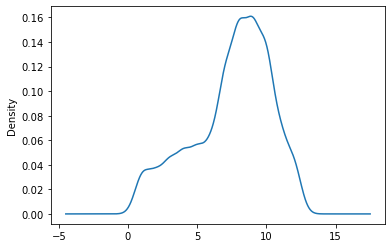

In [29]:
kpmg_customeradd['property_valuation'].plot(kind='kde')

In [30]:
# plot distribution uisng hist.

<AxesSubplot:ylabel='Frequency'>

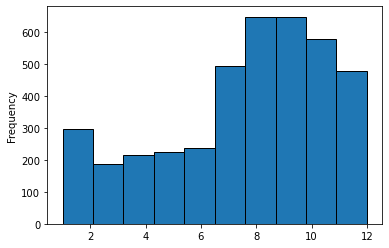

In [31]:
kpmg_customeradd['property_valuation'].plot(kind='hist', edgecolor='black')

In [32]:
# plot distribution of value in one column, group by anothe column.

<AxesSubplot:>

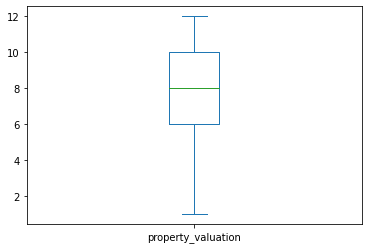

In [33]:
kpmg_customeradd['property_valuation'].plot(kind='box')

<AxesSubplot:xlabel='State', ylabel='count'>

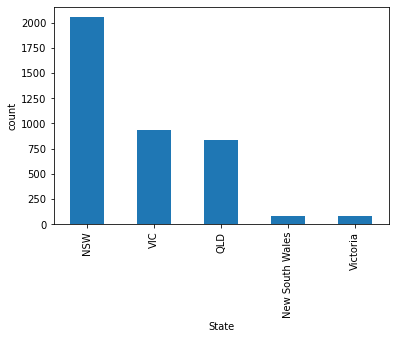

In [34]:
kpmg_customeradd['state'].value_counts().plot(kind='bar', xlabel='State', ylabel='count')

<AxesSubplot:title={'center':'property_valuation'}, xlabel='state'>

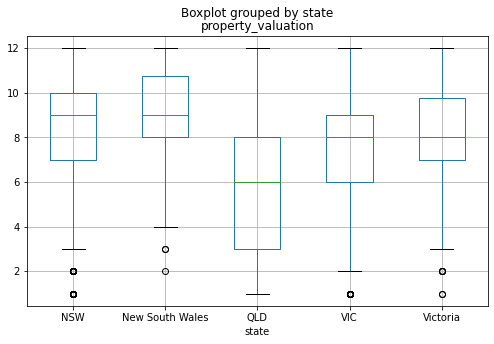

In [35]:
kpmg_customeradd.boxplot(column=['property_valuation'], by='state', figsize=(8,5))

In [36]:
kpmg_customeradd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [37]:
#kpmg_plot=kpmg_customeradd[['address', 'property_valuation', 'state']]

In [38]:
#kpmg_plot

In [39]:
#kpmg_plot.plot.bar(x='state', stacked=True, title="", figsize=(20,5))

In [40]:
#postal_grp['state'].value_counts().loc['']

In [41]:
#ax.plot.bar(x='address', y='property_valuation', figsize=(10,5))

In [42]:
#ax.boxplot(column=['property_valuation','customer_id'], by='postcode')

In [43]:
#kpmg_customeradd[(kpmg_customeradd.postcode==2756)]

# Saving final dataset 

In [44]:
kpmg_customeradd.to_csv("customer_add.csv")

# -----------------------------------------------------------------------------------------------------------

# Customer Transaction Data

In [45]:
kpmg_transaction=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="Transactions", skiprows=1)

In [46]:
kpmg_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [47]:
kpmg_transaction.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [48]:
kpmg_transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


# Checking the Completeness of the data

In [49]:
null_set=kpmg_transaction.isnull().sum()
null_set

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [50]:
cnt_value=kpmg_transaction.count().sort_values(ascending=False)
cnt_value

transaction_id             20000
product_id                 20000
customer_id                20000
transaction_date           20000
order_status               20000
list_price                 20000
brand                      19803
product_line               19803
product_class              19803
product_size               19803
standard_cost              19803
product_first_sold_date    19803
online_order               19640
dtype: int64

In [51]:
per_null_set=kpmg_transaction.isnull().sum()/len(kpmg_transaction)*100
per_null_set

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [52]:
total_missing_set=pd.concat({'Missing values':null_set, 'total records':cnt_value, 'Percent of null values':per_null_set}, axis=1)
total_missing_set

,Missing values,total records,Percent of null values
transaction_id,0,20000,0.000
product_id,0,20000,0.000
customer_id,0,20000,0.000
transaction_date,0,20000,0.000
online_order,360,19640,1.800
order_status,0,20000,0.000
brand,197,19803,0.985
product_line,197,19803,0.985
product_class,197,19803,0.985
product_size,197,19803,0.985


# Checking the accuracy of Data

# Checking for single transaction details, refer to transaction with unique values

In [53]:
kpmg_trans=kpmg_transaction['customer_id']==402
kpmg_trans_15=kpmg_transaction[kpmg_trans]
print(kpmg_trans_15[['product_id','customer_id', 'online_order','brand']])

       product_id  customer_id  online_order           brand
2              37          402           0.0      OHM Cycles
1673           47          402           1.0   Trek Bicycles
13819          12          402           1.0        WeareA2B
17126           3          402           0.0   Trek Bicycles
17823          61          402           1.0      OHM Cycles
18311          77          402           0.0  Norco Bicycles


In [54]:
#kpmg_transaction[(kpmg_transaction.product_id==88)][['product_id', 'customer_id', 'online_order','brand']]

# Checking Uniqueness of data

In [55]:
kpmg_unique=kpmg_transaction.nunique()
kpmg_unique

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [56]:
kpmg_redundent=kpmg_transaction[kpmg_transaction.duplicated()]
kpmg_redundent

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


# Checking Consistency and Validity of transaction data

In [57]:
kpmg_transaction.shape

(20000, 13)

In [58]:
kpmg_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

# Data Cleaning, Analysis and Modeling

In [59]:
tran_grp=kpmg_transaction.groupby(['customer_id'])
tran_grp['order_status'].value_counts().loc[5]

order_status
Approved    6
Name: order_status, dtype: int64

In [60]:
kpmg_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [61]:
#kpmg_transaction['brand']=kpmg_transaction['brand'].astype('string')

In [62]:
tran_grp['transaction_date'].value_counts().loc[402]

transaction_date
2017-01-29    1
2017-05-05    1
2017-09-30    1
2017-10-03    1
2017-10-16    1
2017-11-04    1
Name: transaction_date, dtype: int64

In [63]:
tran_grp['brand'].str.contains('Trek').sum()

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [64]:
tran_grp['brand'].apply(lambda x: x.str.contains('Cycles').sum()).head()

customer_id
1    2
2    0
3    0
4    0
5    0
Name: brand, dtype: int64

In [65]:
kpmg_transaction.dropna(inplace=True)

In [66]:
kpmg_transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [67]:
kpmg_transaction.count()

transaction_id             19445
product_id                 19445
customer_id                19445
transaction_date           19445
online_order               19445
order_status               19445
brand                      19445
product_line               19445
product_class              19445
product_size               19445
list_price                 19445
standard_cost              19445
product_first_sold_date    19445
dtype: int64

In [68]:
kpmg_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


# Dataset distribution & outliers

<AxesSubplot:ylabel='Density'>

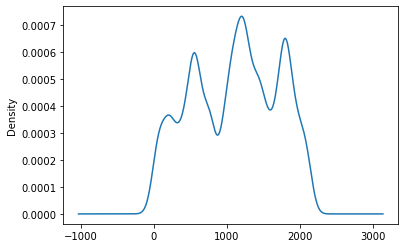

In [69]:
kpmg_transaction['list_price'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

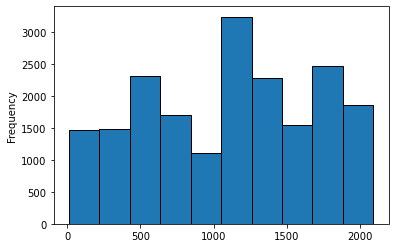

In [70]:
kpmg_transaction['list_price'].plot(kind='hist',edgecolor='black')

<AxesSubplot:>

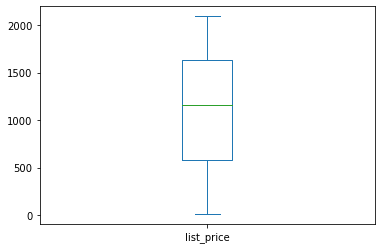

In [71]:
kpmg_transaction['list_price'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

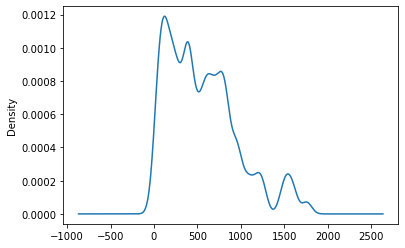

In [72]:
kpmg_transaction['standard_cost'].plot(kind='kde')

<AxesSubplot:>

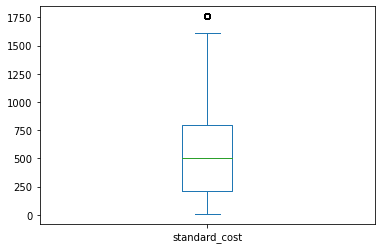

In [73]:
kpmg_transaction['standard_cost'].plot(kind='box')

# Below are the outliner values

In [74]:
filter1=kpmg_transaction[kpmg_transaction['standard_cost']>=1600].index
#.sort_values(by='standard_cost', ascending=False).index

In [75]:
kpmg_transaction.drop(filter1, inplace=True)

<AxesSubplot:xlabel='standard_cost', ylabel='list_price'>

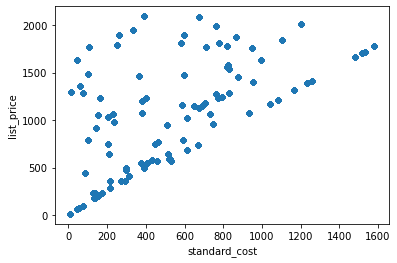

In [76]:
kpmg_transaction.plot.scatter(x='standard_cost', y='list_price') 

In [77]:
kpmg_transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

# Saving Final Dataset

In [78]:
kpmg_transaction.to_csv('customer_trans.csv')

# ---------------------------------------------------------------------------------------------------

# Customer Demograph Data

In [79]:
kpmg_demograph=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", skiprows=1)

C:\Users\student\AppData\Local\Temp/ipykernel_25828/2008857924.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  kpmg_demograph=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerDemographic", skiprows=1)


In [80]:
kpmg_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [81]:
kpmg_demograph.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [82]:
kpmg_demograph.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


# Checking the Completeness of data

In [83]:
null_demo=kpmg_demograph.isnull().sum()
null_demo

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [84]:
count_demo=kpmg_demograph.count().sort_values(ascending=False)
count_demo

customer_id                            4000
first_name                             4000
gender                                 4000
past_3_years_bike_related_purchases    4000
wealth_segment                         4000
deceased_indicator                     4000
owns_car                               4000
DOB                                    3913
tenure                                 3913
last_name                              3875
default                                3698
job_title                              3494
job_industry_category                  3344
dtype: int64

In [85]:
per_missing_demo=kpmg_demograph.isnull().sum()/len(kpmg_demograph)*100
per_missing_demo

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
default                                 7.550
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [86]:
missing_set_demo=pd.concat({'missing values':null_demo, 'Number of records':count_demo, 'percent of missing values':per_missing_demo}, axis=1)
missing_set_demo

,missing values,Number of records,percent of missing values
customer_id,0,4000,0.000
first_name,0,4000,0.000
last_name,125,3875,3.125
gender,0,4000,0.000
past_3_years_bike_related_purchases,0,4000,0.000
DOB,87,3913,2.175
job_title,506,3494,12.650
job_industry_category,656,3344,16.400
wealth_segment,0,4000,0.000
deceased_indicator,0,4000,0.000


# Checking for accuracy of data

# selecting single customer id to know unique values

# Checking Uniqueness of Data

In [87]:
kpmg_dupli=kpmg_demograph[kpmg_demograph.duplicated()]
kpmg_dupli

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [88]:
kpmg_uniq=kpmg_demograph.nunique()
kpmg_uniq

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

# Checking consistency and validity of data

In [89]:
kpmg_demograph.shape

(4000, 13)

In [90]:
kpmg_demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [91]:
kpmg_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [92]:
kpmg_demograph.job_industry_category.duplicated().value_counts()

True     3990
False      10
Name: job_industry_category, dtype: int64

In [93]:
demo_dup=kpmg_demograph.groupby(['gender'])
demo_dup['job_industry_category'].value_counts().loc['Male']

job_industry_category
Financial Services    375
Manufacturing         371
Health                293
Retail                174
Property              123
IT                     72
Entertainment          69
Argiculture            56
Telecommunications     33
Name: job_industry_category, dtype: int64

In [94]:
#kpmg_demograph[kpmg_demograph.isnull().all(axis=1)]

In [95]:
kpmg_demograph.drop(['default'], axis=1, inplace=True)

In [132]:
kpmg_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Pristnor,Male,33,1961-10-03 00:00:00,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0


In [97]:
kpmg_demograph.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

# Replacing inaccurate values 

In [98]:
kpmg_demograph['gender']=kpmg_demograph['gender'].replace(['F','M','Femal'], ['Female','Male', 'Female'])

In [99]:
kpmg_demograph[(kpmg_demograph.gender=='U')]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
452,453,Cornelius,Yarmouth,U,81,NaT,Assistant Professor,IT,High Net Worth,N,No,NaN
453,454,Eugenie,Domenc,U,58,NaT,Research Nurse,Health,Affluent Customer,N,Yes,NaN
479,480,Darelle,Ive,U,67,NaT,Registered Nurse,Health,Mass Customer,N,Yes,NaN
512,513,Kienan,Soar,U,30,NaT,Tax Accountant,IT,Mass Customer,N,No,NaN


In [100]:
kpmg_demograph['last_name'].value_counts().head()

Pristnor    3
Ramsdell    3
Eager       2
Zisneros    2
Dredge      2
Name: last_name, dtype: int64

In [101]:
kpmg_demograph['last_name'].fillna(kpmg_demograph['last_name'].value_counts().index[0], inplace=True)

In [102]:
kpmg_demograph['job_industry_category'].value_counts().sort_values(ascending=False)

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [103]:
kpmg_demograph['job_industry_category'].fillna(kpmg_demograph['job_industry_category'].value_counts().index[0], inplace=True)

In [104]:
kpmg_demograph['job_title'].value_counts().sort_values(ascending=False).head()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
Name: job_title, dtype: int64

In [105]:
kpmg_demograph['job_title'].fillna(kpmg_demograph['job_title'].value_counts().index[0], inplace=True)

In [106]:
kpmg_demograph.isnull().sum()

customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 87
dtype: int64

In [107]:
kpmg_demograph['tenure'].value_counts().sort_values(ascending=False)

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
4.0     191
13.0    191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [108]:
kpmg_demograph['tenure'].median()

11.0

In [109]:
kpmg_demograph['tenure'].fillna(kpmg_demograph['tenure'].median(), inplace=True)

In [110]:
kpmg_demograph.isnull().sum()

customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
dtype: int64

# Filling any empty values with ZERO

In [111]:
kpmg_demograph.fillna(0, inplace=True)

In [112]:
kpmg_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Pristnor,Male,33,1961-10-03 00:00:00,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0


# filter 

In [113]:
filter3=(kpmg_demograph['gender']=='U') & (kpmg_demograph['DOB']==0)
#filter=kpmg_demograph[(kpmg_demograph.gender=='U') & (kpmg_demograph.DOB==0)]
kpmg_demograph[filter3]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,0,Environmental Tech,IT,Mass Customer,N,No,11.0
167,168,Reggie,Broggetti,U,8,0,General Manager,IT,Affluent Customer,N,Yes,11.0
266,267,Edgar,Buckler,U,53,0,Business Systems Development Analyst,IT,High Net Worth,N,No,11.0
289,290,Giorgio,Kevane,U,42,0,Senior Sales Associate,IT,Mass Customer,N,No,11.0
450,451,Marlow,Flowerdew,U,37,0,Quality Control Specialist,IT,High Net Worth,N,No,11.0
452,453,Cornelius,Yarmouth,U,81,0,Assistant Professor,IT,High Net Worth,N,No,11.0
453,454,Eugenie,Domenc,U,58,0,Research Nurse,Health,Affluent Customer,N,Yes,11.0
479,480,Darelle,Ive,U,67,0,Registered Nurse,Health,Mass Customer,N,Yes,11.0
512,513,Kienan,Soar,U,30,0,Tax Accountant,IT,Mass Customer,N,No,11.0
525,526,Ardelle,Pristnor,U,9,0,Social Worker,Health,Mass Customer,N,Yes,11.0


In [114]:
new_kpmg_demograph=kpmg_demograph[~filter3]
new_kpmg_demograph.shape

(3913, 12)

In [115]:
new_kpmg_demograph['DOB']=pd.to_datetime(new_kpmg_demograph['DOB']).astype("string")

C:\Users\student\AppData\Local\Temp/ipykernel_25828/3234530202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_kpmg_demograph['DOB']=pd.to_datetime(new_kpmg_demograph['DOB']).astype("string")


In [116]:
new_kpmg_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Pristnor,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0


In [117]:
new_kpmg_demograph.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     string
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                 float64
dtype: object

In [118]:
#new_kpmg_demograph.isnull().sum()

In [119]:
from datetime import datetime, date

#born='26-01-2000'
def age(born):
    born=datetime.strptime(born,"%Y-%m-%d").date()
    today=date.today()
    return today.year - born.year - ((today.month, today.day)< (born.month, born.day))
new_kpmg_demograph['age']=new_kpmg_demograph['DOB'].apply(age)

C:\Users\student\AppData\Local\Temp/ipykernel_25828/3013510136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_kpmg_demograph['age']=new_kpmg_demograph['DOB'].apply(age)


In [120]:
new_kpmg_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,Pristnor,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,61
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0,46


In [121]:
new_kpmg_demograph.groupby(['gender'])['age'].value_counts().sort_values(ascending=False).head()

gender  age
Male    45     131
Female  45     116
        46      97
Male    46      85
Female  49      78
Name: age, dtype: int64

In [122]:
q=new_kpmg_demograph[new_kpmg_demograph['age']>=60]['past_3_years_bike_related_purchases'].value_counts().reset_index()
q.columns=['Age','Last 3 years purchase']
q.head()

,Age,Last 3 years purchase
0,67,16
1,19,13
2,15,12
3,65,12
4,13,12


# Dataset distribution and outliers

<AxesSubplot:>

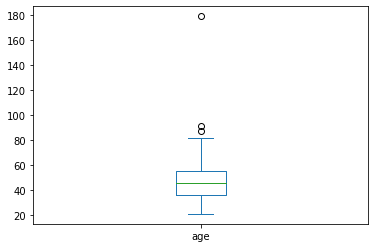

In [123]:
new_kpmg_demograph['age'].plot(kind='box')

# Selecting outlier and droped using filtering using rows values and index

In [124]:
filter4=new_kpmg_demograph[(new_kpmg_demograph.age>=95)].index
filter4

Int64Index([33], dtype='int64')

In [125]:
new_kpmg_demograph.drop(filter4, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:ylabel='Density'>

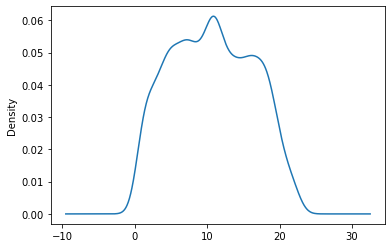

In [126]:
kpmg_demograph['tenure'].plot(kind='kde')

<AxesSubplot:>

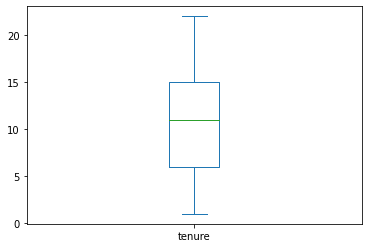

In [127]:
kpmg_demograph['tenure'].plot(kind='box')

<AxesSubplot:>

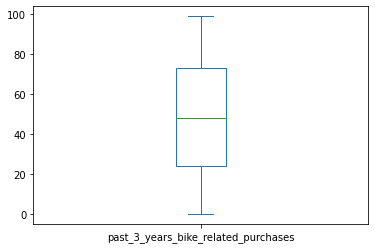

In [128]:
kpmg_demograph['past_3_years_bike_related_purchases'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

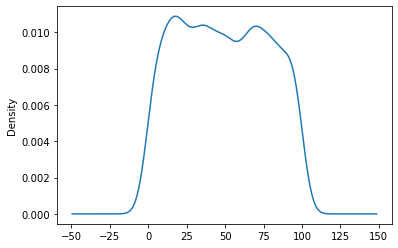

In [129]:
kpmg_demograph['past_3_years_bike_related_purchases'].plot(kind='kde')

In [130]:
new_kpmg_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,Pristnor,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,61
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0,46


# Saving Final DataSet

In [131]:
new_kpmg_demograph.to_csv("customer_demograph.csv")